In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.optimize import curve_fit

In [40]:
df = pd.read_csv("D:/2025 Term 1/MAT3300/world_population.csv")
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


# Q1

In [64]:
# AAGR Compute
years = [year for year in years if year >= 1990]

def calculate_avg_growth(row, years):
    try:
        # Extract initial and final population values
        initial_pop = row[f"{years[0]} Population"]
        final_pop = row[f"{years[-1]} Population"]

        # Check for valid population values
        if initial_pop > 0 and final_pop > 0:
            # Calculate AAGR
            return (final_pop / initial_pop) ** (1 / (years[-1] - years[0])) - 1
        else:
            return np.nan
    except (KeyError, TypeError, ZeroDivisionError) as e:
        # Handle missing columns, invalid data types, or divide-by-zero errors
        return np.nan

# Add AAGR column
df['Avg_Annual_Growth'] = df.apply(lambda row: calculate_avg_growth(row, years), axis=1)

# Display result
print(df[['Country/Territory', 'Avg_Annual_Growth']].head())




  Country/Territory  Avg_Annual_Growth
0       Afghanistan           0.042991
1           Albania          -0.004608
2           Algeria           0.017817
3    American Samoa          -0.002404
4           Andorra           0.012542


In [50]:
# Extract Population Column
population_columns = [col for col in df.columns if 'Population' in col] 

# Calculate the growth every ten years
def calculate_growth_rates_no_year(df, population_columns):
    growth_rate_columns = []
    for i in range(1, len(population_columns)):
        prev_col = population_columns[i-1]
        curr_col = population_columns[i]
        growth_rate_col = f"Growth {prev_col.split()[0]}-{curr_col.split()[0]}"
        df[growth_rate_col] = (df[prev_col] - df[curr_col]) / df[curr_col]
        growth_rate_columns.append(growth_rate_col)
    return df, growth_rate_columns

df, growth_rate_columns = calculate_growth_rates_no_year(df, population_columns)


print(df[['Country/Territory'] + growth_rate_columns].head())



  Country/Territory  Growth 2022-2020  Growth 2020-2015  Growth 2015-2010  \
0       Afghanistan          0.055335          0.154613          0.197371   
1           Albania         -0.008556         -0.005423         -0.010612   
2           Algeria          0.033406          0.098842          0.102822   
3    American Samoa         -0.041482         -0.100822         -0.063465   
4           Andorra          0.027336          0.082987          0.003174   

   Growth 2010-2000  Growth 2000-1990  Growth 1990-1980  Growth 1980-1970  \
0          0.442445          0.827336         -0.143500          0.161226   
1         -0.084419         -0.034307          0.120142          0.265373   
2          0.165127          0.205993          0.361735          0.358328   
3         -0.058063          0.217742          0.454053          0.214626   
4          0.082031          0.233867          0.504282          0.793102   

   Growth 1970-World  
0       2.067879e+07  
1       5.811827e+07  
2    

## AAGR Calculation 

In [153]:
# 重新定义 years 列表，过滤从 1990 年开始的年份
years = [year for year in years if year >= 1990]

# AAGR Compute
def calculate_avg_growth(row, years):
    try:
        # Extract initial and final population values
        initial_pop = row[f"{years[0]} Population"]  # 从1990年开始
        final_pop = row[f"{years[-1]} Population"]  # 最后一个年份

        # Check for valid population values
        if initial_pop > 0 and final_pop > 0:
            # Calculate AAGR
            return (final_pop / initial_pop) ** (1 / (years[-1] - years[0])) - 1
        else:
            return np.nan
    except (KeyError, TypeError, ZeroDivisionError) as e:
        # Handle missing columns, invalid data types, or divide-by-zero errors
        return np.nan

# Add AAGR column
df['Avg_Annual_Growth'] = df.apply(lambda row: calculate_avg_growth(row, years), axis=1)

# Display result
print(df[['Country/Territory', 'Avg_Annual_Growth']].head())


  Country/Territory  Avg_Annual_Growth
0       Afghanistan           0.028634
1           Albania          -0.002002
2           Algeria           0.018325
3    American Samoa          -0.021010
4           Andorra           0.015358


In [66]:
df['Category'] = pd.cut(df['Avg_Annual_Growth'], 
                        bins=[-np.inf, 0, 0.015, np.inf], 
                        labels=['Declining','Stable','Rapid Growth'])

print(df[['Country/Territory','Avg_Annual_Growth','Category']].head())
print(df.head())

  Country/Territory  Avg_Annual_Growth      Category
0       Afghanistan           0.042991  Rapid Growth
1           Albania          -0.004608     Declining
2           Algeria           0.017817  Rapid Growth
3    American Samoa          -0.002404     Declining
4           Andorra           0.012542        Stable
   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  ...  \
0         38972230         33753499         28189672         19542982  ...   
1          2866849          2882481          291339

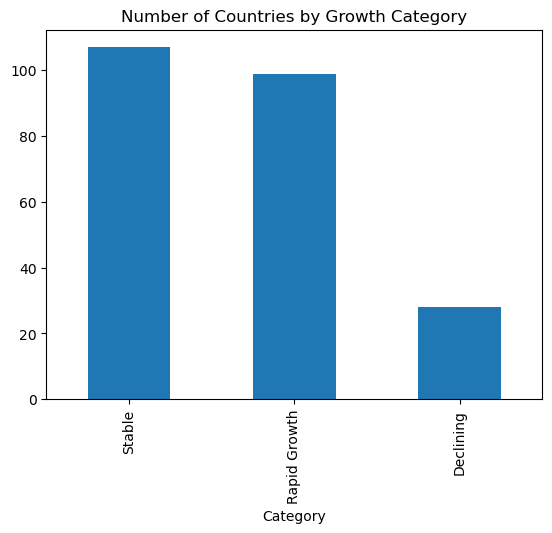

In [157]:
df['Category'].value_counts().plot(kind='bar', title='Number of Countries by Growth Category')
plt.show()

##  Factors determination

In [68]:
# Let's create a numeric dataset for modeling
features = ['Density (per km²)','Area (km²)']

# Encode Continent if categorical
le = LabelEncoder()
df['Continent_Code'] = le.fit_transform(df['Continent'])

X = df[['Density (per km²)', 'Area (km²)', 'Continent_Code']]
y = df['Avg_Annual_Growth']

print(X.head(), y.head())

   Density (per km²)  Area (km²)  Continent_Code
0            63.0587      652230               1
1            98.8702       28748               2
2            18.8531     2381741               0
3           222.4774         199               4
4           170.5641         468               2 0    0.042991
1   -0.004608
2    0.017817
3   -0.002404
4    0.012542
Name: Avg_Annual_Growth, dtype: float64


                   Density (per km²)  Area (km²)  Continent_Code  \
Density (per km²)           1.000000   -0.063128       -0.043148   
Area (km²)                 -0.063128    1.000000        0.037024   
Continent_Code             -0.043148    0.037024        1.000000   
Avg_Annual_Growth           0.007154   -0.011874       -0.413619   

                   Avg_Annual_Growth  
Density (per km²)           0.007154  
Area (km²)                 -0.011874  
Continent_Code             -0.413619  
Avg_Annual_Growth           1.000000  


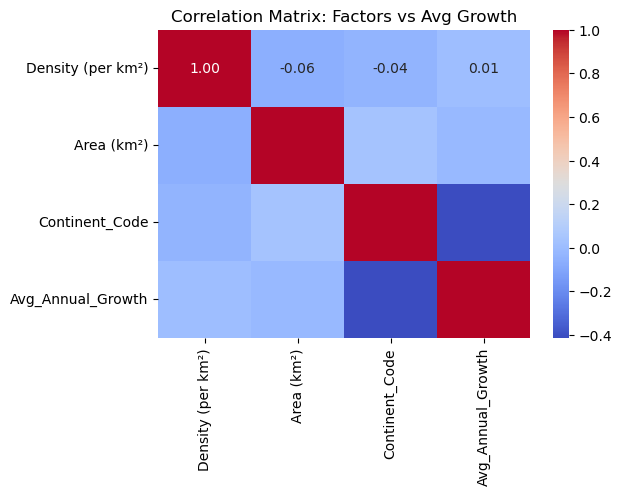

In [76]:
# Data Merge
df_analysis = X.copy()
df_analysis['Avg_Annual_Growth'] = y

# correlation_matrix Calculation
correlation_matrix = df_analysis.corr()

print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Factors vs Avg Growth")
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Add the constant term
X_with_const = sm.add_constant(X)

# OLS 
model = sm.OLS(y, X_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Avg_Annual_Growth   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     15.84
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           2.14e-09
Time:                        20:39:07   Log-Likelihood:                 712.26
No. Observations:                 234   AIC:                            -1417.
Df Residuals:                     230   BIC:                            -1403.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0200      0.00

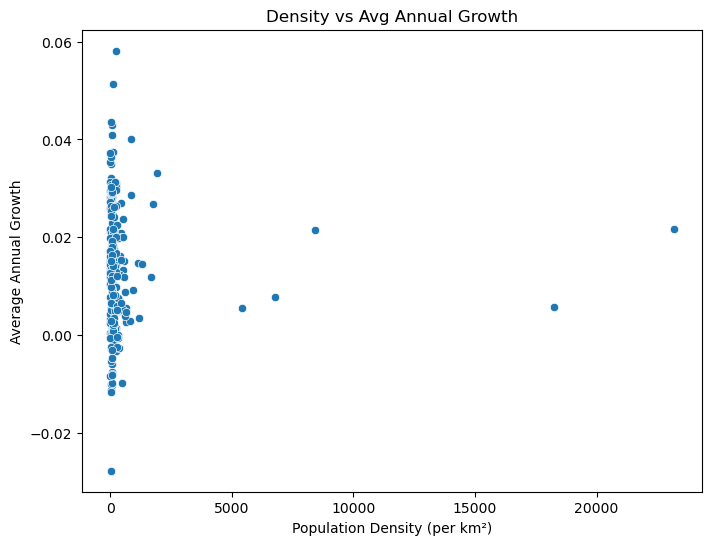

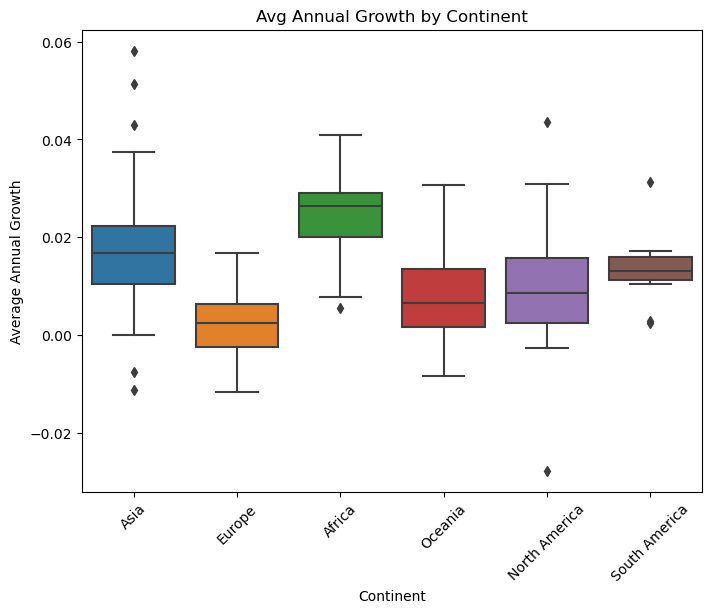

In [80]:
# Density vs Avg_Annual_Growth
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Density (per km²)', y='Avg_Annual_Growth', data=df)
plt.title('Density vs Avg Annual Growth')
plt.xlabel('Population Density (per km²)')
plt.ylabel('Average Annual Growth')
plt.show()

# Continent vs Avg_Annual_Growth
plt.figure(figsize=(8, 6))
sns.boxplot(x='Continent', y='Avg_Annual_Growth', data=df)
plt.title('Avg Annual Growth by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Annual Growth')
plt.xticks(rotation=45)
plt.show()

  # Q2


In [85]:
df.to_excel('D:/2025 Term 1/MAT3300/output.xlsx', index=False, engine='openpyxl')

In [87]:
# Prepare dataset
# Filter data for years 1970–2015 for training
columns_to_use = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', 
                  '2010 Population']
df_train = df[['Country/Territory', 'Category'] + columns_to_use]

years = [1970, 1980, 1990, 2000, 2010, 2015]
df_train = df_train.melt(id_vars=['Country/Territory', 'Category'], 
                         value_vars=columns_to_use, 
                         var_name='Year', value_name='Population')

# Extract numeric year
df_train['Year'] = df_train['Year'].str.extract('(\d+)').astype(int)
print(df_train.head())

  Country/Territory      Category  Year  Population
0       Afghanistan  Rapid Growth  1970    10752971
1           Albania     Declining  1970     2324731
2           Algeria  Rapid Growth  1970    13795915
3    American Samoa     Declining  1970       27075
4           Andorra        Stable  1970       19860


In [89]:
columns_to_use_test = ['2015 Population','2020 Population', '2022 Population']
validate_years = [2015, 2020, 2022]

df_validate = df[['Country/Territory', 'Category'] + columns_to_use_test]

df_validate = df_validate.melt(id_vars=['Country/Territory', 'Category'], 
                                value_vars=columns_to_use_test, 
                                var_name='Year', value_name='Population')

# Extract numeric year
df_validate['Year'] = df_validate['Year'].str.extract('(\d+)').astype(int)
print(df_validate.head())

  Country/Territory      Category  Year  Population
0       Afghanistan  Rapid Growth  2015    33753499
1           Albania     Declining  2015     2882481
2           Algeria  Rapid Growth  2015    39543154
3    American Samoa     Declining  2015       51368
4           Andorra        Stable  2015       71746


In [101]:
def logistic_growth(t, K, r, P0):
    """Logistic growth function."""
    return K / (1 + ((K - P0) / P0) * np.exp(-r * (t - 1970)))

def fit_logistic_model(data):
    """Fit logistic model for rapid growth countries."""
    years = data['Year'].values
    population = data['Population'].values

    # Initial parameter guesses
    initial_K = max(population) * 2
    initial_r = 0.015
    initial_P0 = population[0]

    # Fit model
    popt, _ = curve_fit(logistic_growth, years, population, 
                        p0=[initial_K, initial_r, initial_P0], maxfev=10000)
    return popt  # Returns K, r, P0

In [103]:
def quadratic_growth(t, a, b, P0):
    """
    Quadratic growth function: P(t) = a * (t - 1970)^2 + b * (t - 1970) + P0
    """
    return a * (t - 1970)**2 + b * (t - 1970) + P0
    
def fit_quadratic_model(data):
    """
    Fit quadratic model for stable growth countries.
    """
    years = data['Year'].values
    population = data['Population'].values

    # degree=2
    coeffs = np.polyfit(years - 1970, population, 2)  # 1970 base
    a, b, P0 = coeffs[0], coeffs[1], coeffs[2]
    
    return a, b, P0

In [105]:
def modified_exponential_decline(t, r, P0, k):
    """Modified exponential decline model with linear adjustment."""
    return P0 * np.exp(-r * (t - 1990)) + k * (t - 1990)

def fit_modified_exponential_model(data):
    """Fit modified exponential decline model for declining countries."""
    filtered_data = data[data['Year'] >= 1990]
    years = filtered_data['Year'].values
    population = filtered_data['Population'].values

 
    initial_r = 0.015  # initial decrease rate
    initial_P0 = population[0]  # initial population
    initial_k = -0.2  # linear adjustment factor

  
    popt, pcov = curve_fit(modified_exponential_decline, years, population, 
                           p0=[initial_r, initial_P0, initial_k], maxfev=10000)
    

    return popt  

In [107]:
# Initialize dictionaries to store models
models = {'Rapid Growth': {}, 'Stable': {}, 'Declining': {}}

# Train models for each country
for country in df_train['Country/Territory'].unique():
    category = df_train[df_train['Country/Territory'] == country]['Category'].iloc[0]
    country_data = df_train[df_train['Country/Territory'] == country]

    if category == 'Rapid Growth':
        # Logistic Growth 
        K, r, P0 = fit_logistic_model(country_data)
        models['Rapid Growth'][country] = {'K': K, 'r': r, 'P0': P0}

    elif category == 'Stable':
        # Quadratic Growth
        a, b, P0 = fit_quadratic_model(country_data)
        models['Stable'][country] = {'a': a, 'b': b, 'P0': P0}
        
    elif category == 'Declining':
        # Modified Exponential Decline
        popt = fit_modified_exponential_model(country_data)  #
        if popt is not None:  #
            r, P0, k = popt
            models['Declining'][country] = {'r': r, 'P0': P0, 'k': k}
        else:
            print(f"Warning: Model fitting failed for {country}.")

C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [117]:
# Initiallize
validation_results = []

for country in df_validate['Country/Territory'].unique():
    # Data acquire
    category = df_validate[df_validate['Country/Territory'] == country]['Category'].iloc[0]
    country_data = df_validate[df_validate['Country/Territory'] == country]

    actual_population = country_data['Population'].values  # 真实人口数据
    years = country_data['Year'].values  # 对应年份

    # Prediction
    if category == 'Rapid Growth' and country in models['Rapid Growth']:
        # Logistic Growth 
        params = models['Rapid Growth'][country]
        predicted_population = [
            logistic_growth(year, params['K'], params['r'], params['P0']) for year in years
        ]

    elif category == 'Stable' and country in models['Stable']:
        # Quadratic Growth
        params = models['Stable'][country]
        predicted_population = [
            quadratic_growth(year, params['a'], params['b'], params['P0']) for year in years
        ]

    elif category == 'Declining' and country in models['Declining']:
        # Modified Exponential Decline
        params = models['Declining'][country]
        predicted_population = [
            modified_exponential_decline(year, params['r'], params['P0'], params['k']) for year in years
        ]

    else:
        continue  # Skip if no model


    #Calculate MAE and RMSE
    mae = mean_absolute_error(actual_population, predicted_population)
    rmse = mean_squared_error(actual_population, predicted_population, squared=False)

    # Percent Format
    avg_actual_population = actual_population.mean()
    mae_percent = (mae / avg_actual_population) * 100
    rmse_percent = (rmse / avg_actual_population) * 100
    
    
    # Save Result
    validation_results.append({
        'Country': country,
        'Category': category,
        'MAE (%)': mae_percent,
        'RMSE (%)': rmse_percent
    })

# Transform DataFrame
validation_df = pd.DataFrame(validation_results)
print(validation_df.head())

          Country      Category    MAE (%)   RMSE (%)
0     Afghanistan  Rapid Growth   6.837738   6.841125
1         Albania     Declining   3.362550   3.657403
2         Algeria  Rapid Growth   8.087329   8.629392
3  American Samoa     Declining  27.573282  28.861991
4         Andorra        Stable   3.235661   3.421530


In [119]:
# Calculate by category
category_metrics = validation_df.groupby('Category')[['MAE (%)', 'RMSE (%)']].mean().reset_index()
print("category_metrics：")
print(category_metrics)

category_metrics：
       Category   MAE (%)  RMSE (%)
0     Declining  7.812800  8.360631
1  Rapid Growth  6.822838  7.397105
2        Stable  4.726565  5.079717


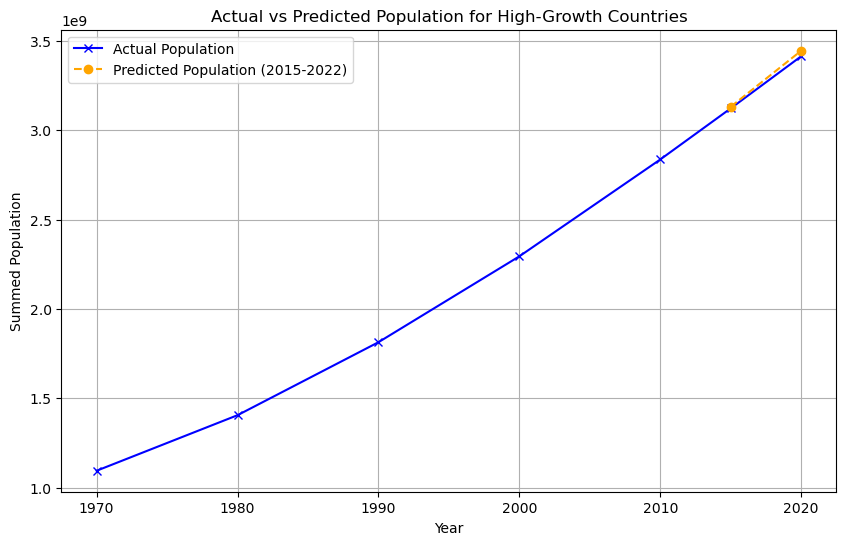

In [165]:
import matplotlib.pyplot as plt

# Filter high-growth countries
high_growth_countries_past=df_train[df_train['Category'] == 'Rapid Growth']
high_growth_countries = df_validate[df_validate['Category'] == 'Rapid Growth']

# Create storage for data
years_actual = list(range(1970, 2011, 10))  # 1970-2010
years_predicted = list(range(2015, 2023, 5))  # 2015-2022

# Prepare summed population data
actual_population_1970_2010 = []
actual_population_2015_2022 = []
predicted_population_2015_2022 = []

# Sum up population data for each year range
for year in years_actual:
    actual_population_1970_2010.append(high_growth_countries_past[high_growth_countries_past['Year'] == year]['Population'].sum())

for year in years_predicted:
    actual_pop = high_growth_countries[high_growth_countries['Year'] == year]['Population'].sum()
    actual_population_2015_2022.append(actual_pop)

    predicted_pop = 0
    for country in high_growth_countries['Country/Territory'].unique():
        if country in models['Rapid Growth']:
            params = models['Rapid Growth'][country]
            predicted_pop += logistic_growth(year, params['K'], params['r'], params['P0'])
    predicted_population_2015_2022.append(predicted_pop)

# Combine years and populations for the plot
all_actual_years = years_actual + years_predicted
all_actual_population = actual_population_1970_2010 + actual_population_2015_2022

# Plot
plt.figure(figsize=(10, 6))
plt.plot(all_actual_years, all_actual_population, label='Actual Population', marker='x', linestyle='-', color='blue')
plt.plot(years_predicted, predicted_population_2015_2022, label='Predicted Population (2015-2022)', 
         marker='o', linestyle='--', color='orange')

# Customize plot
plt.title('Actual vs Predicted Population for High-Growth Countries')
plt.xlabel('Year')
plt.ylabel('Summed Population')
plt.legend()
plt.grid()
plt.show()


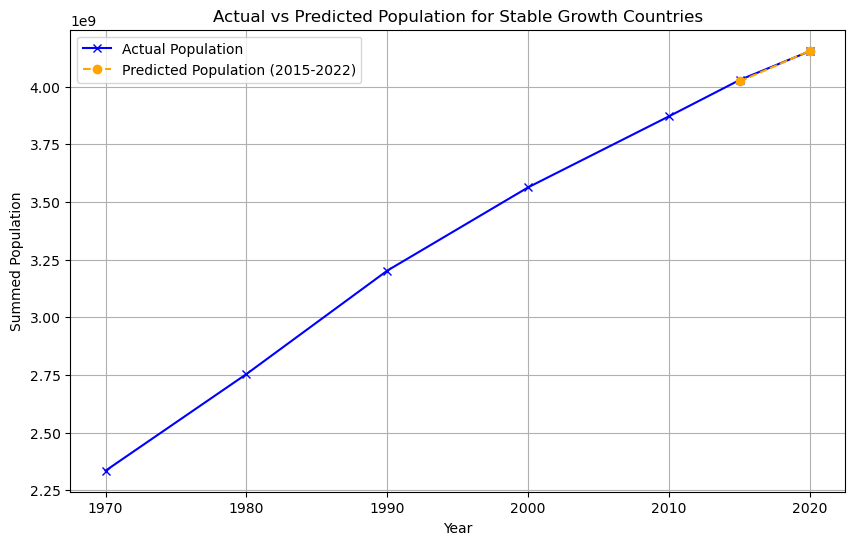

In [167]:
import matplotlib.pyplot as plt

# Filter stable growth countries
stable_growth_countries_past = df_train[df_train['Category'] == 'Stable']
stable_growth_countries = df_validate[df_validate['Category'] == 'Stable']

# Create storage for data
years_actual = list(range(1970, 2011, 10))  # 1970-2010
years_predicted = list(range(2015, 2023, 5))  # 2015-2022

# Prepare summed population data
actual_population_1970_2010 = []
actual_population_2015_2022 = []
predicted_population_2015_2022 = []

# Sum up population data for each year range
for year in years_actual:
    actual_population_1970_2010.append(stable_growth_countries_past[
        stable_growth_countries_past['Year'] == year]['Population'].sum())

for year in years_predicted:
    actual_pop = stable_growth_countries[stable_growth_countries['Year'] == year]['Population'].sum()
    actual_population_2015_2022.append(actual_pop)

    predicted_pop = 0
    for country in stable_growth_countries['Country/Territory'].unique():
        if country in models['Stable']:
            params = models['Stable'][country]
            predicted_pop += quadratic_growth(year, params['a'], params['b'], params['P0'])  # Quadratic model
    predicted_population_2015_2022.append(predicted_pop)

# Combine years and populations for the plot
all_actual_years = years_actual + years_predicted
all_actual_population = actual_population_1970_2010 + actual_population_2015_2022

# Plot
plt.figure(figsize=(10, 6))
plt.plot(all_actual_years, all_actual_population, label='Actual Population', marker='x', linestyle='-', color='blue')
plt.plot(years_predicted, predicted_population_2015_2022, label='Predicted Population (2015-2022)', 
         marker='o', linestyle='--', color='orange')

# Customize plot
plt.title('Actual vs Predicted Population for Stable Growth Countries')
plt.xlabel('Year')
plt.ylabel('Summed Population')
plt.legend()
plt.grid()
plt.show()


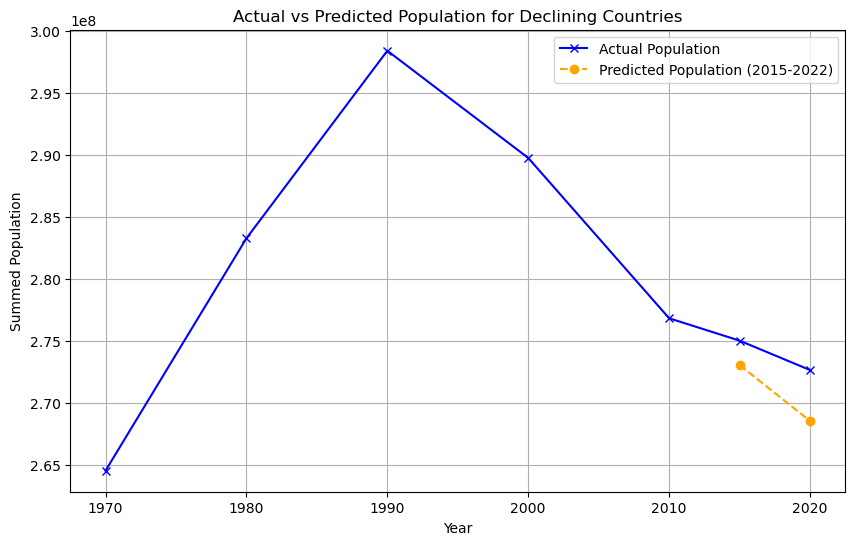

In [169]:
import matplotlib.pyplot as plt

# Filter declining growth countries
declining_growth_countries_past = df_train[df_train['Category'] == 'Declining']
declining_growth_countries = df_validate[df_validate['Category'] == 'Declining']

# Create storage for data
years_actual = list(range(1970, 2011, 10))  # 1970-2010
years_predicted = list(range(2015, 2023, 5))  # 2015-2022

# Prepare summed population data
actual_population_1970_2010 = []
actual_population_2015_2022 = []
predicted_population_2015_2022 = []

# Sum up population data for each year range
for year in years_actual:
    actual_population_1970_2010.append(declining_growth_countries_past[
        declining_growth_countries_past['Year'] == year]['Population'].sum())

for year in years_predicted:
    actual_pop = declining_growth_countries[declining_growth_countries['Year'] == year]['Population'].sum()
    actual_population_2015_2022.append(actual_pop)

    predicted_pop = 0
    for country in declining_growth_countries['Country/Territory'].unique():
        if country in models['Declining']:
            params = models['Declining'][country]
            predicted_pop += modified_exponential_decline(year, params['r'], params['P0'], params['k'])  # Decline model
    predicted_population_2015_2022.append(predicted_pop)

# Combine years and populations for the plot
all_actual_years = years_actual + years_predicted
all_actual_population = actual_population_1970_2010 + actual_population_2015_2022

# Plot
plt.figure(figsize=(10, 6))
plt.plot(all_actual_years, all_actual_population, label='Actual Population', marker='x', linestyle='-', color='blue')
plt.plot(years_predicted, predicted_population_2015_2022, label='Predicted Population (2015-2022)', 
         marker='o', linestyle='--', color='orange')

# Customize plot
plt.title('Actual vs Predicted Population for Declining Countries')
plt.xlabel('Year')
plt.ylabel('Summed Population')
plt.legend()
plt.grid()
plt.show()


In [130]:
# Define prediction years
future_years = np.arange(2023, 2051)

# Initialize predictions dictionary
predictions = {}

# Predict population for each country
for country in df['Country/Territory'].unique():
    # Get the category of the country
    category = df[df['Country/Territory'] == country]['Category'].iloc[0]
    
    # Logistic Growth Model Prediction for Rapid Growth Countries
    if category == 'Rapid Growth' and country in models['Rapid Growth']:
        params = models['Rapid Growth'][country]
        predictions[country] = [
            logistic_growth(year, params['K'], params['r'], params['P0']) for year in future_years
        ]
    
    # Quadratic Growth Model Prediction for Stable Countries
    elif category == 'Stable' and country in models['Stable']:
        params = models['Stable'][country]
        predictions[country] = [
            quadratic_growth(year, params['a'], params['b'], params['P0']) for year in future_years
        ]
    
    # Modified Exponential Decline Model for Declining Countries
    elif category == 'Declining' and country in models['Declining']:
        params = models['Declining'][country]
        predictions[country] = [
            modified_exponential_decline(year, params['r'], params['P0'], params['k']) for year in future_years
        ]
    
    # Skip countries if no model is available
    else:
        print(f"Warning: No prediction for {country} due to missing model.")
        predictions[country] = [None] * len(future_years)

# Convert the predictions dictionary into a DataFrame for display
prediction_df = pd.DataFrame(predictions, index=future_years)
print("Population Predictions from 2023 to 2050:")
print(prediction_df.head())


Population Predictions from 2023 to 2050:
       Afghanistan       Albania       Algeria  American Samoa       Andorra  \
2023  3.967968e+07  2.691252e+06  4.044308e+07    61718.721014  76920.640000   
2024  4.087938e+07  2.672169e+06  4.071779e+07    62070.302493  77010.182857   
2025  4.211535e+07  2.653086e+06  4.098205e+07    62421.883973  77062.457143   
2026  4.338869e+07  2.634003e+06  4.123609e+07    62773.465453  77077.462857   
2027  4.470053e+07  2.614920e+06  4.148018e+07    63125.046933  77055.200000   

            Angola      Anguilla  Antigua and Barbuda     Argentina  \
2023  3.630345e+07  17317.532686        109507.255000  4.660223e+07   
2024  3.756429e+07  17683.562737        111651.177143  4.701463e+07   
2025  3.886891e+07  18057.329338        113843.417857  4.742633e+07   
2026  4.021885e+07  18438.996012        116083.977143  4.783734e+07   
2027  4.161568e+07  18828.729737        118372.855000  4.824765e+07   

           Armenia  ...    Uzbekistan        Vanua

# Q3

In [132]:
# Add continent information to the predictions
df_continents = df[['Country/Territory', 'Continent']]  # Extract country-to-continent mapping

# Add continent to prediction DataFrame
predictions_df = prediction_df.T.reset_index()
predictions_df = predictions_df.rename(columns={'index': 'Country/Territory'})
predictions_df = predictions_df.merge(df_continents, on='Country/Territory', how='left')

# Aggregate population by continent
regional_population = predictions_df.groupby('Continent').sum()
regional_population = regional_population.T  # Transpose for easier plotting

# Align the index with future_years
regional_population = regional_population.loc[future_years]

# Correct global population calculation
global_population = regional_population.sum(axis=1)  # Sum across all continents (row-wise)
global_population.index = future_years  # Assign the correct years to the index

# Output results
print("Regional Population by Continent:")
print(regional_population.head())

print("\nGlobal Population:")
print(global_population.head())

Regional Population by Continent:
Continent             Africa               Asia            Europe  \
2023        1431563832.25973  4834038288.865384   746194530.88224   
2024       1465330192.299102   4878345144.74638  747116866.784474   
2025       1499845726.972943  4922319370.251122  748047589.162692   
2026       1535130683.465913  4965970696.666389  748986648.680149   
2027       1571205975.067396  5009310993.118105  749933997.046755   

Continent     North America          Oceania     South America  
2023       627302552.964172  45330860.924388  452704081.921146  
2024       633865028.386072  46056502.519563  456989520.327884  
2025       640447603.919342  46794624.265969  461247197.667606  
2026       647049955.382755  47545529.674307   465477029.85308  
2027       653671759.711861  48309532.143701  469678942.693676  

Global Population:
2023     8137134147.81706
2024    8227703255.063474
2025    8318702112.239674
2026    8410160543.722594
2027    8502111199.781494
dtype: obje

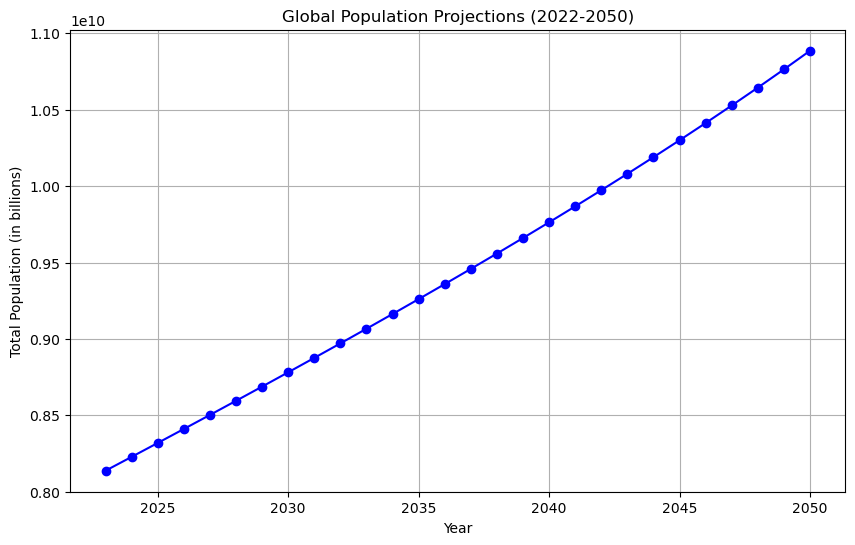

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(global_population.index, global_population.values, color='b', marker='o', linestyle='-')
plt.title("Global Population Projections (2022-2050)")
plt.xlabel("Year")
plt.ylabel("Total Population (in billions)")
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

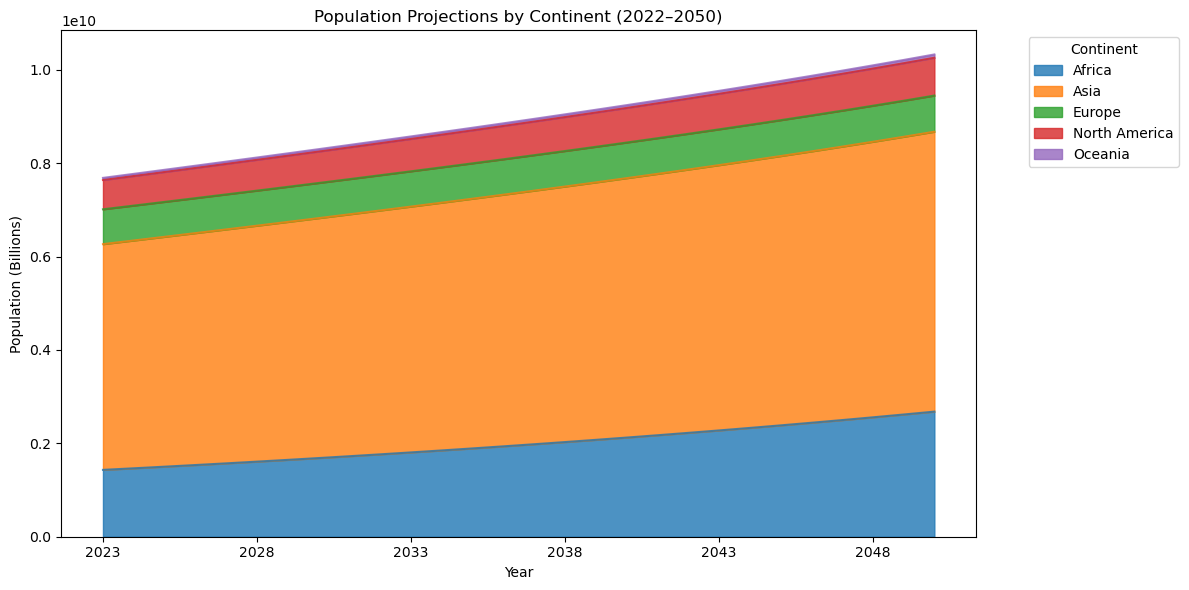

In [142]:
plt.figure(figsize=(12, 6))
regional_population.iloc[:, :-1].plot(kind='area', stacked=True, figsize=(12, 6), alpha=0.8)
plt.title('Population Projections by Continent (2022–2050)')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

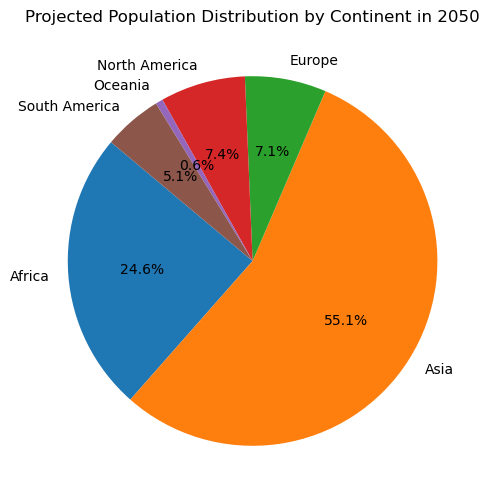

In [173]:
population_2050 = regional_population.loc[2050]

plt.figure(figsize=(8, 6))
plt.pie(population_2050, labels=population_2050.index, autopct='%1.1f%%', startangle=140)
plt.title("Projected Population Distribution by Continent in 2050")
plt.show()

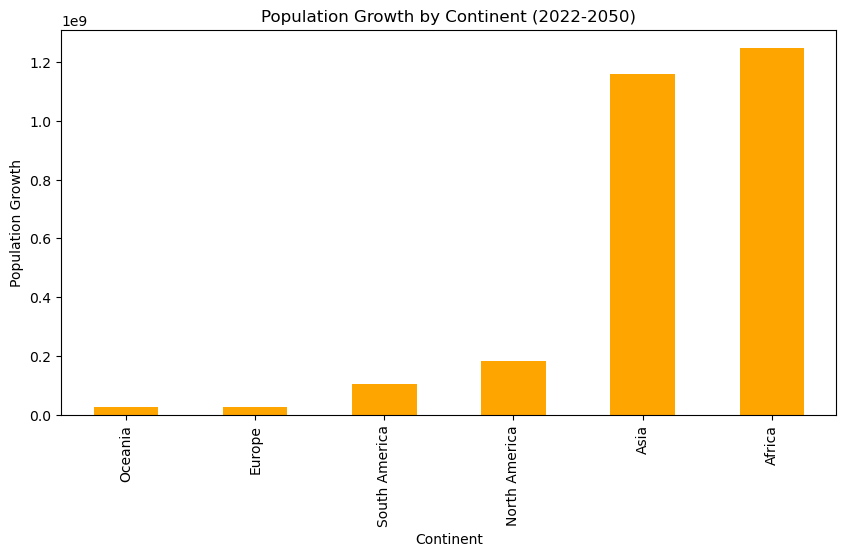

In [175]:
growth = regional_population.loc[2050] - regional_population.loc[2023]

plt.figure(figsize=(10, 5))
growth.sort_values().plot(kind='bar', color='orange')
plt.title("Population Growth by Continent (2022-2050)")
plt.ylabel("Population Growth")
plt.xlabel("Continent")
plt.show()

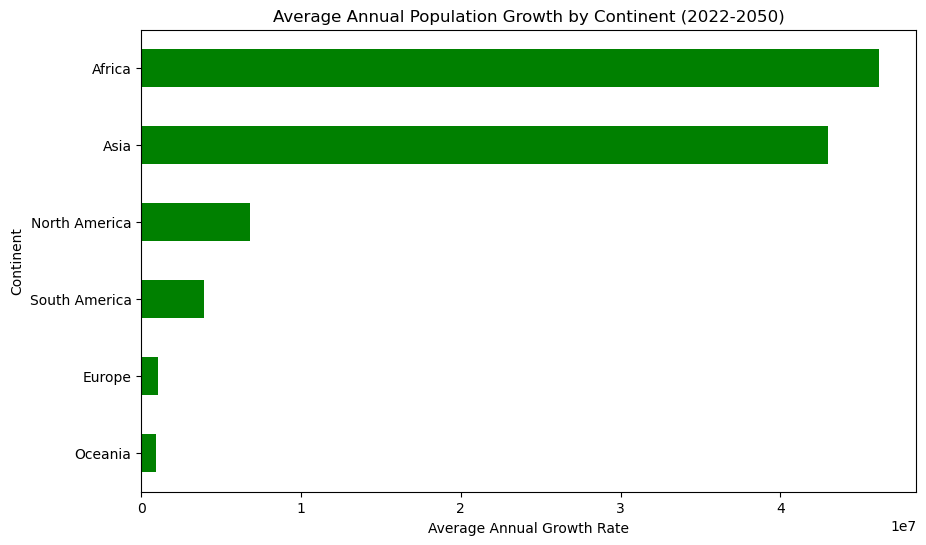

In [148]:
# Calculate average annual growth rate
annual_growth = regional_population.diff().mean()

plt.figure(figsize=(10, 6))
annual_growth.sort_values().plot(kind='barh', color='green')
plt.title("Average Annual Population Growth by Continent (2022-2050)")
plt.xlabel("Average Annual Growth Rate")
plt.ylabel("Continent")
plt.show()